# Experiments - Evolutionary Algorithm TSP

In [1]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
from tsp_evolutionary_algorithm import TSPEvolutionaryAlgorithm
from Reporter import Reporter

In [2]:
# The dataset filenames
datasets = ['tour29.csv', 'tour100.csv', 'tour194.csv', 'tour929.csv']
benchmarks = [(27200, 30350.13), (7350, 8636.5), (9000, 11385.01), (95300, 113683.58)]
limits = [(26000, 31000), [7000, 9500], [8500, 12000], [94000, 120000]]

# Sequence of Experiments

## 1. Typical Convergence Graph

In [22]:
dataset_idx = 0

file = open('datasets/' + datasets[dataset_idx])
distance_matrix = np.loadtxt(file, delimiter=",")
file.close()

reporter = Reporter(datasets[dataset_idx][:-4])
ga = TSPEvolutionaryAlgorithm(distance_matrix, lambda_=10, mu=10, k=4,
                              recombination_probability=0.9,
                              mutation_probability=0.9,
                              local_search_probability=1,
                              mutation_strength=1,
                              fitness_sharing_alpha=1,
                              fitness_sharing_sigma=len(distance_matrix)//5)

while not ga.converged(improvement_criterion=True, improvement_threshold=200):
    ga.update()

    # extract results of current generation
    mean_objective = ga.mean_objective
    best_objective = ga.best_objective
    best_solution = ga.best_solution
    time_left = reporter.report(mean_objective,
                                best_objective,
                                best_solution)
    print(ga.state, round(time_left))
    if time_left < 0:
        break
        
print('Converged!')

#1 Best Objective: 28298.012326560114 - Mean Objective: 31358.552313874938 - Diversity: 1.0 300
#2 Best Objective: 27808.745725320743 - Mean Objective: 28400.12774965529 - Diversity: 1.0 300
#3 Best Objective: 27808.74572532074 - Mean Objective: 28268.73104440329 - Diversity: 1.0 300
#4 Best Objective: 27672.47407848784 - Mean Objective: 28084.517357614743 - Diversity: 1.0 300
#5 Best Objective: 27154.48839924464 - Mean Objective: 28029.06857860703 - Diversity: 1.0 300
#6 Best Objective: 27154.48839924464 - Mean Objective: 27991.641909277936 - Diversity: 1.0 300
#7 Best Objective: 27154.48839924464 - Mean Objective: 27934.46128736701 - Diversity: 1.0 300
#8 Best Objective: 27154.48839924464 - Mean Objective: 27888.293324147173 - Diversity: 1.0 300
#9 Best Objective: 27154.48839924464 - Mean Objective: 27888.293324147173 - Diversity: 1.0 300
#10 Best Objective: 27154.48839924464 - Mean Objective: 27823.75044610221 - Diversity: 1.0 300
#11 Best Objective: 27154.48839924464 - Mean Objecti

#91 Best Objective: 27154.48839924464 - Mean Objective: 27489.913704103696 - Diversity: 1.0 297
#92 Best Objective: 27154.48839924464 - Mean Objective: 27489.913704103696 - Diversity: 1.0 297
#93 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 297
#94 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 297
#95 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 297
#96 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 297
#97 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 297
#98 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 297
#99 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 297
#100 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 297
#101 Best Objective: 27154.48839924464 

#179 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 294
#180 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 294
#181 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 294
#182 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 294
#183 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 294
#184 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 294
#185 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 294
#186 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 294
#187 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 294
#188 Best Objective: 27154.48839924464 - Mean Objective: 27488.726767658136 - Diversity: 1.0 294
#189 Best Objective: 27154.488

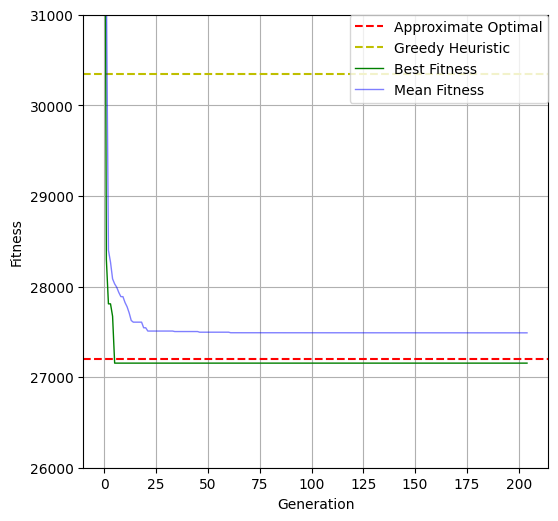

In [23]:
from matplotlib import pyplot as plt

def plot_convergence_graph(ga: TSPEvolutionaryAlgorithm, optimal, greedy, limits):
    best_fitnesses = ga.best_history
    mean_fitnesses = ga.mean_history

    fig = plt.figure('Convergence Graph', figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
    plt.axhline(y=optimal, color='r', linestyle='--')
    plt.axhline(y=greedy, color='y', linestyle='--')
    plt.plot(best_fitnesses, 'g', alpha=1, lw=1)
    plt.plot(mean_fitnesses, 'b', alpha=0.5, lw=1)
    plt.plot(0, best_fitnesses[0], 'gx')
    plt.plot(0, mean_fitnesses[0], 'bx')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend(['Approximate Optimal', 'Greedy Heuristic', 'Best Fitness', 'Mean Fitness'],
               bbox_to_anchor=(1, 1), loc=1, borderaxespad=0)

    plt.grid(True)
    plt.ylim(limits)
    plt.show()

plot_convergence_graph(ga, 
                       optimal=benchmarks[dataset_idx][0], 
                       greedy=benchmarks[dataset_idx][1],
                       limits=limits[dataset_idx])

## 2. Best Tour Length and Best Sequence of Cities

In [6]:
print(f'Best solution:\n\tfitness = {ga.best_solution.fitness}')
print(f'\troute = {ga.best_solution.route}')

Best solution:
	fitness = 96953.57508056797
	route = [925, 927, 922, 920, 918, 913, 907, 894, 899, 916, 917, 915, 912, 910, 909, 911, 906, 904, 903, 898, 893, 890, 897, 887, 884, 863, 853, 843, 830, 804, 826, 834, 835, 854, 857, 861, 870, 881, 871, 873, 877, 878, 883, 872, 865, 864, 851, 846, 847, 859, 845, 841, 827, 832, 818, 811, 627, 628, 645, 723, 765, 783, 787, 813, 814, 812, 802, 803, 788, 792, 790, 807, 815, 805, 806, 808, 809, 797, 774, 768, 776, 770, 757, 758, 752, 748, 756, 762, 767, 760, 771, 784, 775, 786, 791, 798, 801, 799, 800, 785, 782, 789, 780, 769, 750, 749, 739, 731, 727, 712, 703, 698, 696, 688, 689, 701, 711, 718, 724, 734, 737, 728, 715, 699, 694, 684, 697, 713, 740, 753, 766, 747, 742, 702, 683, 658, 642, 668, 677, 670, 666, 674, 657, 656, 659, 669, 673, 676, 681, 693, 680, 678, 671, 652, 651, 654, 667, 655, 644, 639, 643, 650, 653, 660, 665, 695, 709, 710, 720, 733, 735, 746, 751, 755, 764, 773, 778, 781, 772, 761, 763, 716, 706, 708, 719, 736, 741, 738, 730, 7

In [11]:
np.argmin(ga.best_solution.route)
route = ga.best_solution.route
print(route[573:] + route[:573])

[0, 18, 26, 51, 67, 65, 78, 131, 132, 102, 96, 88, 72, 59, 36, 32, 27, 12, 14, 9, 2, 3, 4, 10, 17, 13, 30, 29, 19, 28, 35, 33, 20, 38, 37, 46, 44, 50, 52, 53, 55, 54, 60, 63, 66, 70, 69, 74, 68, 73, 82, 86, 95, 98, 229, 251, 261, 288, 298, 299, 302, 294, 310, 316, 320, 334, 323, 301, 300, 290, 286, 289, 278, 266, 243, 248, 245, 249, 252, 255, 257, 267, 262, 276, 263, 258, 204, 153, 237, 203, 180, 165, 161, 147, 143, 130, 109, 105, 108, 104, 120, 124, 126, 133, 145, 156, 146, 154, 159, 174, 182, 185, 187, 199, 214, 227, 233, 222, 211, 208, 206, 193, 190, 186, 176, 173, 179, 172, 181, 184, 192, 205, 202, 194, 189, 196, 207, 215, 217, 221, 225, 234, 228, 216, 226, 235, 239, 240, 242, 246, 247, 241, 238, 232, 230, 224, 223, 210, 198, 213, 201, 188, 177, 175, 169, 167, 163, 160, 148, 141, 139, 137, 144, 151, 171, 168, 162, 157, 155, 140, 128, 138, 164, 166, 183, 195, 209, 197, 212, 218, 220, 231, 219, 191, 170, 150, 106, 112, 111, 121, 107, 116, 129, 113, 103, 114, 119, 123, 136, 134, 135, 

## 3. Results Interpretation 

## 4. Histogram of Best and Mean Fitnesses for 1000 iterations (only for tour29)

In [422]:
dataset_idx = 0
file = open('datasets/' + datasets[dataset_idx])
distance_matrix = np.loadtxt(file, delimiter=",")
file.close()

best_fitnesses = []
mean_fitnesses = []

while len(best_fitnesses) < 1000:
    reporter = Reporter(datasets[dataset_idx][:-4] + f'_{iter}')
    ga = TSPEvolutionaryAlgorithm(distance_matrix, lambda_=10, mu=5, k=3,
                                  recombination_probability=0.9,
                                  mutation_probability=0.1,
                                  local_search_probability=1,#0.3,
                                  mutation_strength=3,
                                  fitness_sharing_alpha=1,
                                  fitness_sharing_sigma=len(distance_matrix)//10)

    while not ga.converged(max_iterations=50):
        ga.update()

        # extract results of current generation
        mean_objective = ga.mean_objective
        best_objective = ga.best_objective
        best_solution = ga.best_solution
#         time_left = reporter.report(mean_objective,
#                                     best_objective,
#                                     best_solution)
        

    best_fitnesses.append(best_objective)
    mean_fitnesses.append(mean_objective)
    print(f'#{len(best_fitnesses)} converged!')

print(best_solution.route)

Reached maximum number of iterations
#1 converged!
Reached maximum number of iterations
#2 converged!
Reached maximum number of iterations
#3 converged!
Reached maximum number of iterations
#4 converged!
Reached maximum number of iterations
#5 converged!
Reached maximum number of iterations
#6 converged!
Reached maximum number of iterations
#7 converged!
Reached maximum number of iterations
#8 converged!
Reached maximum number of iterations
#9 converged!
Reached maximum number of iterations
#10 converged!
Reached maximum number of iterations
#11 converged!
Reached maximum number of iterations
#12 converged!
Reached maximum number of iterations
#13 converged!
Reached maximum number of iterations
#14 converged!
Reached maximum number of iterations
#15 converged!
Reached maximum number of iterations
#16 converged!
Reached maximum number of iterations
#17 converged!
Reached maximum number of iterations
#18 converged!
Reached maximum number of iterations
#19 converged!
Reached maximum numbe

Reached maximum number of iterations
#158 converged!
Reached maximum number of iterations
#159 converged!
Reached maximum number of iterations
#160 converged!
Reached maximum number of iterations
#161 converged!
Reached maximum number of iterations
#162 converged!
Reached maximum number of iterations
#163 converged!
Reached maximum number of iterations
#164 converged!
Reached maximum number of iterations
#165 converged!
Reached maximum number of iterations
#166 converged!
Reached maximum number of iterations
#167 converged!
Reached maximum number of iterations
#168 converged!
Reached maximum number of iterations
#169 converged!
Reached maximum number of iterations
#170 converged!
Reached maximum number of iterations
#171 converged!
Reached maximum number of iterations
#172 converged!
Reached maximum number of iterations
#173 converged!
Reached maximum number of iterations
#174 converged!
Reached maximum number of iterations
#175 converged!
Reached maximum number of iterations
#176 conv

Reached maximum number of iterations
#313 converged!
Reached maximum number of iterations
#314 converged!
Reached maximum number of iterations
#315 converged!
Reached maximum number of iterations
#316 converged!
Reached maximum number of iterations
#317 converged!
Reached maximum number of iterations
#318 converged!
Reached maximum number of iterations
#319 converged!
Reached maximum number of iterations
#320 converged!
Reached maximum number of iterations
#321 converged!
Reached maximum number of iterations
#322 converged!
Reached maximum number of iterations
#323 converged!
Reached maximum number of iterations
#324 converged!
Reached maximum number of iterations
#325 converged!
Reached maximum number of iterations
#326 converged!
Reached maximum number of iterations
#327 converged!
Reached maximum number of iterations
#328 converged!
Reached maximum number of iterations
#329 converged!
Reached maximum number of iterations
#330 converged!
Reached maximum number of iterations
#331 conv

Reached maximum number of iterations
#468 converged!
Reached maximum number of iterations
#469 converged!
Reached maximum number of iterations
#470 converged!
Reached maximum number of iterations
#471 converged!
Reached maximum number of iterations
#472 converged!
Reached maximum number of iterations
#473 converged!
Reached maximum number of iterations
#474 converged!
Reached maximum number of iterations
#475 converged!
Reached maximum number of iterations
#476 converged!
Reached maximum number of iterations
#477 converged!
Reached maximum number of iterations
#478 converged!
Reached maximum number of iterations
#479 converged!
Reached maximum number of iterations
#480 converged!
Reached maximum number of iterations
#481 converged!
Reached maximum number of iterations
#482 converged!
Reached maximum number of iterations
#483 converged!
Reached maximum number of iterations
#484 converged!
Reached maximum number of iterations
#485 converged!
Reached maximum number of iterations
#486 conv

Reached maximum number of iterations
#623 converged!
Reached maximum number of iterations
#624 converged!
Reached maximum number of iterations
#625 converged!
Reached maximum number of iterations
#626 converged!
Reached maximum number of iterations
#627 converged!
Reached maximum number of iterations
#628 converged!
Reached maximum number of iterations
#629 converged!
Reached maximum number of iterations
#630 converged!
Reached maximum number of iterations
#631 converged!
Reached maximum number of iterations
#632 converged!
Reached maximum number of iterations
#633 converged!
Reached maximum number of iterations
#634 converged!
Reached maximum number of iterations
#635 converged!
Reached maximum number of iterations
#636 converged!
Reached maximum number of iterations
#637 converged!
Reached maximum number of iterations
#638 converged!
Reached maximum number of iterations
#639 converged!
Reached maximum number of iterations
#640 converged!
Reached maximum number of iterations
#641 conv

Reached maximum number of iterations
#778 converged!
Reached maximum number of iterations
#779 converged!
Reached maximum number of iterations
#780 converged!
Reached maximum number of iterations
#781 converged!
Reached maximum number of iterations
#782 converged!
Reached maximum number of iterations
#783 converged!
Reached maximum number of iterations
#784 converged!
Reached maximum number of iterations
#785 converged!
Reached maximum number of iterations
#786 converged!
Reached maximum number of iterations
#787 converged!
Reached maximum number of iterations
#788 converged!
Reached maximum number of iterations
#789 converged!
Reached maximum number of iterations
#790 converged!
Reached maximum number of iterations
#791 converged!
Reached maximum number of iterations
#792 converged!
Reached maximum number of iterations
#793 converged!
Reached maximum number of iterations
#794 converged!
Reached maximum number of iterations
#795 converged!
Reached maximum number of iterations
#796 conv

Reached maximum number of iterations
#933 converged!
Reached maximum number of iterations
#934 converged!
Reached maximum number of iterations
#935 converged!
Reached maximum number of iterations
#936 converged!
Reached maximum number of iterations
#937 converged!
Reached maximum number of iterations
#938 converged!
Reached maximum number of iterations
#939 converged!
Reached maximum number of iterations
#940 converged!
Reached maximum number of iterations
#941 converged!
Reached maximum number of iterations
#942 converged!
Reached maximum number of iterations
#943 converged!
Reached maximum number of iterations
#944 converged!
Reached maximum number of iterations
#945 converged!
Reached maximum number of iterations
#946 converged!
Reached maximum number of iterations
#947 converged!
Reached maximum number of iterations
#948 converged!
Reached maximum number of iterations
#949 converged!
Reached maximum number of iterations
#950 converged!
Reached maximum number of iterations
#951 conv

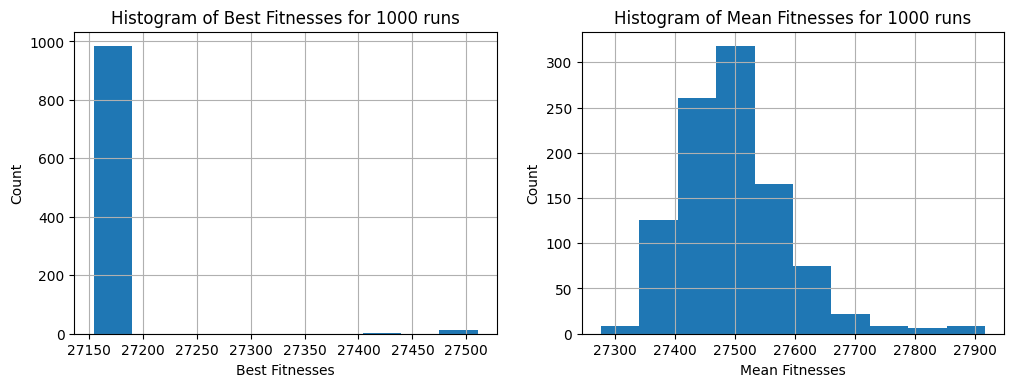

Best fitness mean=27160.06137471839, std=43.44519234412967
Mean fitness mean=27497.005460551067, std=92.03286853386737


In [423]:
from matplotlib import pyplot as plt

def plot_histograms(best_fitnesses, mean_fitnesses):
    fig = plt.figure('Histograms of 1000 runs', figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')
    fig.add_subplot(1, 2, 1)
    fig.add_subplot(1, 2, 2)
    ax = fig.axes
    labels = ['Best Fitnesses', 'Mean Fitnesses']

    for idx in range(2):
        ax[idx].set_xlabel(labels[idx])
        ax[idx].set_ylabel("Count")
        ax[idx].set_title(f'Histogram of {labels[idx]} for 1000 runs')
        ax[idx].grid(True)
        ax[idx].hist([best_fitnesses, mean_fitnesses][idx], bins=10)

    plt.show()
    
""" Plot the histograms """
plot_histograms(best_fitnesses, mean_fitnesses)

best_mean = np.mean(best_fitnesses)
best_std = np.std(best_fitnesses)

mean_mean = np.mean(mean_fitnesses)
mean_std = np.std(mean_fitnesses)

print(f'Best fitness mean={best_mean}, std={best_std}')
print(f'Mean fitness mean={mean_mean}, std={mean_std}')